In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('data/tr.csv')
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Spicejet,2019-06-03,Kolkata,Banglore,22:20:00,00:40:00,140,0,No Info,3873
1,Air India,2019-05-15,Delhi,Cochin,12:00:00,07:40:00,1180,2,No Info,10651
2,Jet Airways,2019-05-24,Kolkata,Banglore,21:10:00,10:05:00,775,1,In-flight meal not included,9663
3,Jet Airways,2019-06-06,Kolkata,Banglore,17:00:00,18:00:00,1500,1,In-flight meal not included,10539
4,Air India,2019-03-06,Delhi,Cochin,06:10:00,08:15:00,1565,1,No Info,11038


### High level summary of the data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          1920 non-null   object
 1   date_of_journey  1920 non-null   object
 2   source           1920 non-null   object
 3   destination      1920 non-null   object
 4   dep_time         1920 non-null   object
 5   arrival_time     1920 non-null   object
 6   duration         1920 non-null   int64 
 7   total_stops      1920 non-null   int64 
 8   additional_info  1920 non-null   object
 9   price            1920 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 150.1+ KB


In [4]:
train = train.assign(**{
    col:pd.to_datetime(train.loc[:,col],format='mixed',dayfirst=True)
    for col in ['date_of_journey','dep_time', 'arrival_time']}
        )

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          1920 non-null   object        
 1   date_of_journey  1920 non-null   datetime64[ns]
 2   source           1920 non-null   object        
 3   destination      1920 non-null   object        
 4   dep_time         1920 non-null   datetime64[ns]
 5   arrival_time     1920 non-null   datetime64[ns]
 6   duration         1920 non-null   int64         
 7   total_stops      1920 non-null   int64         
 8   additional_info  1920 non-null   object        
 9   price            1920 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 150.1+ KB


In [6]:
train.describe(include='number')

,duration,total_stops,price
count,1920.000000,1920.000000,1920.000000
mean,619.705729,0.796354,9120.108854
std,488.182792,0.651840,4726.899607
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5277.000000
50%,505.000000,1.000000,8098.000000
75%,885.000000,1.000000,12384.000000
max,2525.000000,3.000000,62427.000000


In [7]:
train.assign(total_stops = train.total_stops.astype(object)).describe(include='O')

,airline,source,destination,total_stops,additional_info
count,1920,1920,1920,1920,1920
unique,9,5,6,4,7
top,Jet Airways,Delhi,Cochin,1,No Info
freq,686,845,845,1034,1519


### High level analysis of outliers - Isolation Forest

In [8]:
from sklearn.ensemble import IsolationForest

In [9]:
iso = IsolationForest(n_estimators=10, random_state=42)
( train.assign(outlier = iso.fit_predict(train.drop(columns='price').select_dtypes(include='number')))
            .query('outlier==-1'))

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Air India,2019-05-15,Delhi,Cochin,2024-06-11 12:00:00,2024-06-11 07:40:00,1180,2,No Info,10651,-1
3,Jet Airways,2019-06-06,Kolkata,Banglore,2024-06-11 17:00:00,2024-06-11 18:00:00,1500,1,In-flight meal not included,10539,-1
4,Air India,2019-03-06,Delhi,Cochin,2024-06-11 06:10:00,2024-06-11 08:15:00,1565,1,No Info,11038,-1
5,Air India,2019-03-27,Delhi,Cochin,2024-06-11 12:00:00,2024-06-11 19:15:00,435,2,No Info,10493,-1
9,Indigo,2019-03-15,Chennai,Kolkata,2024-06-11 13:20:00,2024-06-11 15:35:00,135,0,No Info,6297,-1
...,...,...,...,...,...,...,...,...,...,...,...
1910,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-11 17:35:00,2024-06-11 04:25:00,650,2,In-flight meal not included,9412,-1
1911,Spicejet,2019-06-12,Kolkata,Banglore,2024-06-11 15:05:00,2024-06-11 20:20:00,315,1,No Info,4649,-1
1912,Indigo,2019-06-12,Delhi,Cochin,2024-06-11 16:00:00,2024-06-11 21:00:00,300,1,No Info,6069,-1
1914,Jet Airways,2019-03-24,Kolkata,Banglore,2024-06-11 13:55:00,2024-06-11 10:05:00,1210,1,In-flight meal not included,11134,-1


### Pair Plots

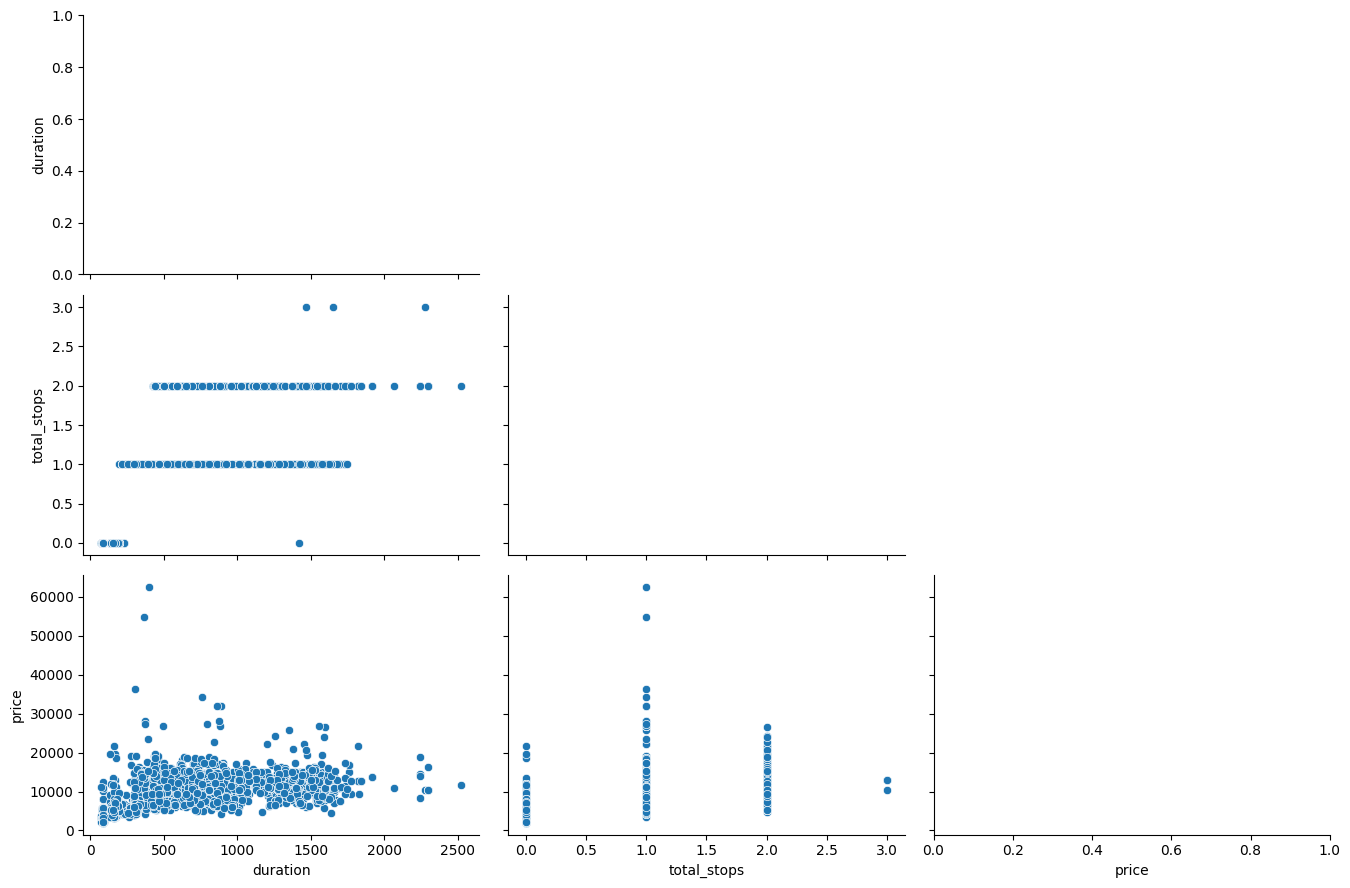

In [10]:
eda_helper.pair_plots(train)

### Corelation Analysis

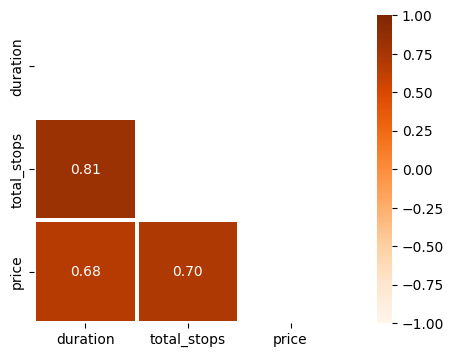

In [11]:
# eda_helper.correlation_heatmap(train)
fig, ax = plt.subplots(figsize=(9,4))
cm = train.corr(method='spearman', numeric_only=True)
mask = np.zeros_like(cm, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cm,vmin=-1,vmax=1,cmap='Oranges',center=0,annot=True,fmt=".2f",linewidths=1.5,ax=ax,mask=mask,square=True)
plt.show()

In [12]:
from eda_helper import compute_correlation_matrix, plot_correlation_matrix
ocm = compute_correlation_matrix(train)
print(ocm)

                  airline    source  destination  additional_info
airline          1.000000  0.272960     0.251296         0.339559
source           0.272960  1.000000     0.999739         0.090067
destination      0.251296  0.999739     1.000000         0.102233
additional_info  0.339559  0.090067     0.102233         1.000000


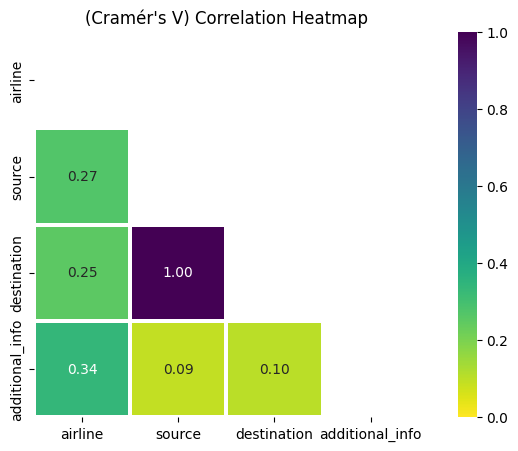

In [13]:
def plot_corr_matrix(corr_matrix):
    plt.figure(figsize=(10, 5))
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_matrix, annot=True, cmap='viridis_r', vmin=0, vmax=1, fmt=".2f", square=True, linewidths=1.5, mask=mask )
    plt.title('(Cramér\'s V) Correlation Heatmap')
    plt.show()
plot_corr_matrix(ocm)

In [14]:
print(plt.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

### Detailed Analysis 

- **Airline**

In [15]:
train.airline.unique()

array(['Spicejet', 'Air India', 'Jet Airways', 'Multiple Carriers',
       'Indigo', 'Air Asia', 'Trujet', 'Vistara', 'Goair'], dtype=object)

In [16]:
eda_helper.cat_summary(train,'airline')

0          Spicejet
1         Air India
2       Jet Airways
3       Jet Airways
4         Air India
           ...     
1915        Vistara
1916    Jet Airways
1917       Air Asia
1918         Indigo
1919      Air India
Name: airline, Length: 1920, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 1,920 / 1,920 rows


,
count,1920
unique,9
top,Jet Airways
freq,686


,count,percentage
category,,
Jet Airways,686,0.357292
Indigo,366,0.190625
Air India,315,0.164062
Multiple Carriers,223,0.116146
Spicejet,147,0.076563
Vistara,84,0.043750
Air Asia,65,0.033854
Goair,33,0.017188
Trujet,1,0.000521


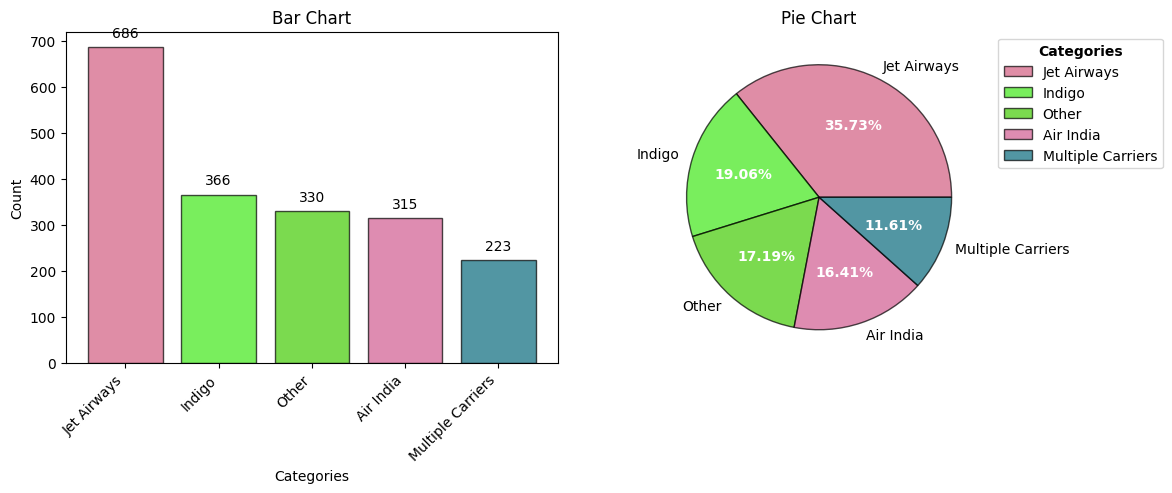

In [17]:
eda_helper.cat_univar_plots(train,'airline', k=4,show_wordcloud=False)

In [18]:
 def rotate_xlabels(ax):
        for label in ax.get_xticklabels():
            label.set_rotation(45)

In [19]:
def cr_mukltiple_plots(data, cat_var, num_var):
    fig, axes = plt.subplots(1, 3, figsize=(14, 5))

    # Box plot
    sns.boxplot(
        data=data,
        x=cat_var,
        y=num_var,
        color="lightgreen",
        ax=axes[0]
    )
    axes[0].set(
        title="Box Plot",
        xlabel=cat_var,
        ylabel=num_var
    )

    # Bar plot
    sns.barplot(
        data=data,
        x=cat_var,
        y=num_var,
        ax=axes[1]
    )
    axes[1].set(
        title="Bar Plot",
        xlabel=cat_var,
        ylabel=num_var
    )

    # Violin plot
    sns.violinplot(
        data=data,
        x=cat_var,
        y=num_var,
        ax=axes[2]
    )
    axes[2].set(
        title="Violin Plot",
        xlabel=cat_var,
        ylabel=num_var
    )
    
    for ax in axes:
        rotate_xlabels(ax)

    plt.tight_layout()
    plt.show()

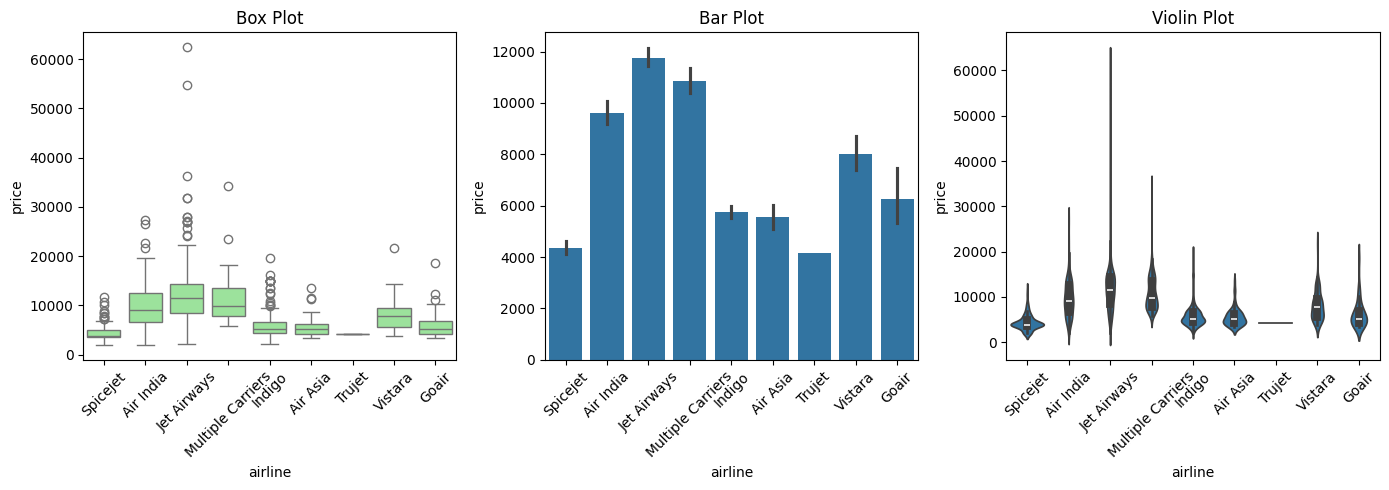

In [20]:
cr_mukltiple_plots(train, 'airline','price')

In [21]:
eda_helper.num_cat_hyp_testing(train, 'price', 'airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 118.67689266604162
- p-value              : 2.2787790698768764e-161
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 851.4811767417449
- p-value              : 1.6427047709939667e-178
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


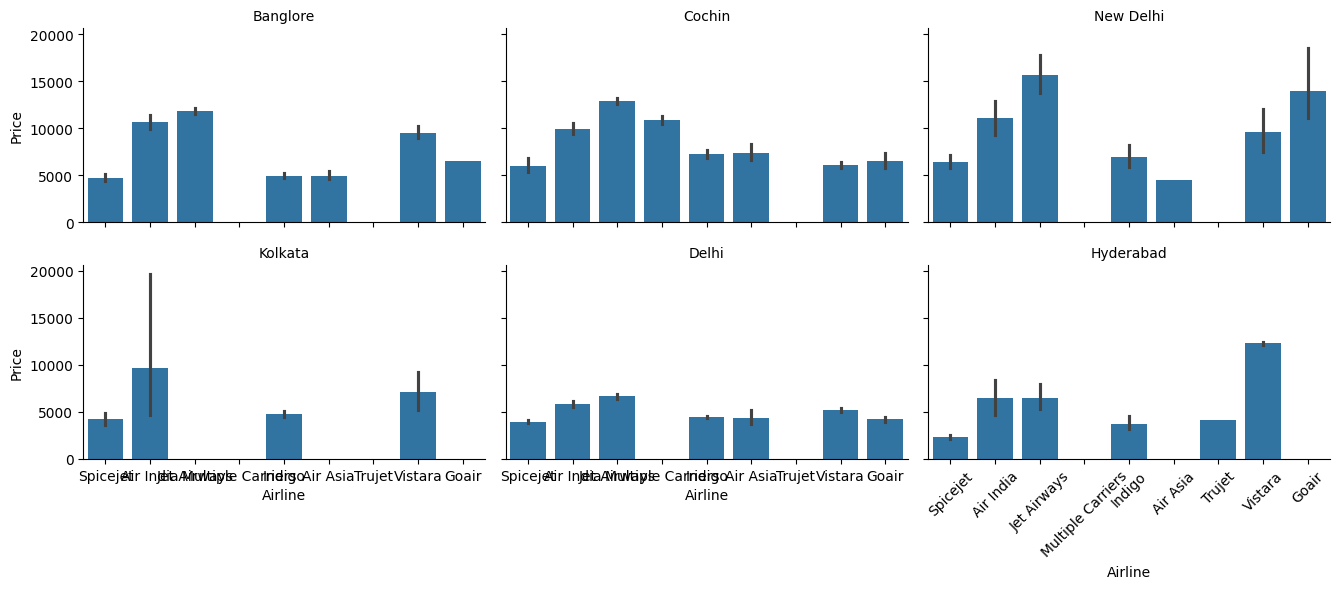

In [22]:
airline_gr = sns.FacetGrid(train,col='destination',aspect=1.5,col_wrap=3,sharey=True)
airline_gr.map_dataframe(sns.barplot, x='airline', y='price', order=train['airline'].unique())

# Add titles and adjust layout
airline_gr.set_titles(col_template="{col_name}")
airline_gr.set_axis_labels("Airline", "Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for ax in airline_gr.axes:
        rotate_xlabels(ax)

- **Date of journey**

In [23]:
eda_helper.cat_summary(train,'date_of_journey')

0      2019-06-03
1      2019-05-15
2      2019-05-24
3      2019-06-06
4      2019-03-06
          ...    
1915   2019-03-03
1916   2019-06-09
1917   2019-06-01
1918   2019-03-21
1919   2019-05-01
Name: date_of_journey, Length: 1920, dtype: datetime64[ns]

Data Type      : datetime64[ns]
Cardinality    : 40 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 1,920 / 1,920 rows


,
count,1920
mean,2019-05-04 01:29:15.000000256
min,2019-03-01 00:00:00
25%,2019-03-27 00:00:00
50%,2019-05-15 00:00:00
75%,2019-06-06 00:00:00
max,2019-06-27 00:00:00


,count,percentage
category,,
2019-06-06,96,0.050000
2019-05-18,93,0.048438
2019-05-21,92,0.047917
2019-05-09,87,0.045312
2019-03-06,84,0.043750
2019-03-21,84,0.043750
2019-06-09,83,0.043229
2019-06-12,75,0.039062
2019-05-27,70,0.036458


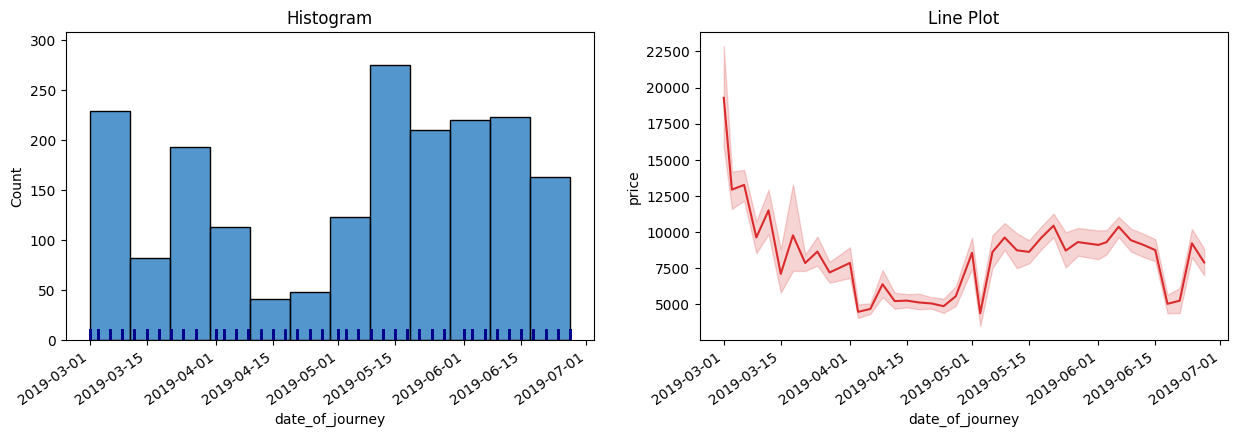

In [24]:
eda_helper.dt_univar_plots(data=train,var="date_of_journey",target="price")

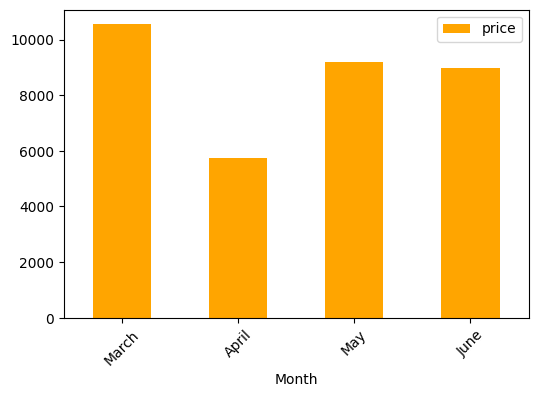

In [25]:
# grouped by month
( train.groupby(pd.Grouper(key='date_of_journey', freq='M'))
 .price.mean().to_frame()
 .set_axis(['March','April','May','June'], axis=0)
 .rename_axis(index='Month')
 .plot(kind='bar', color='orange',figsize=(6,4))
)
ax = plt.gca()
rotate_xlabels(ax)

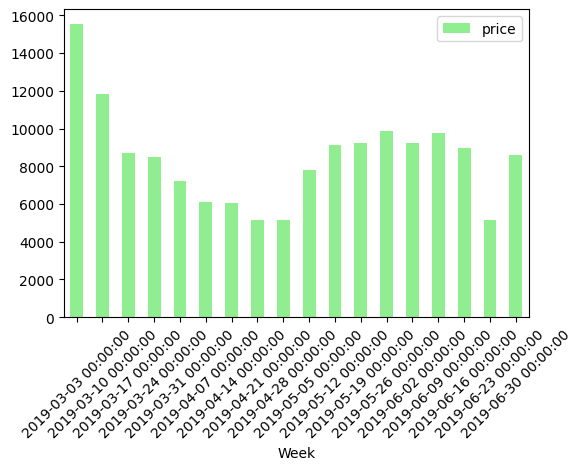

In [26]:
# grouped by week
( train.groupby(pd.Grouper(key='date_of_journey', freq='W'))
 .price.mean().to_frame()
 .rename_axis(index='Week')
 .plot(kind='bar', color='lightgreen',figsize=(6,4))
)
ax = plt.gca()
rotate_xlabels(ax)

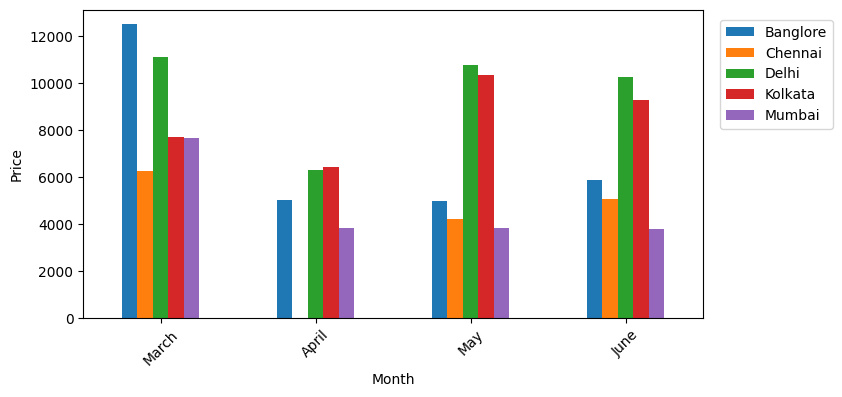

In [27]:
(
    train.groupby([pd.Grouper(key='date_of_journey', freq='M'), 'source'])
    .price.mean()
    .unstack()
    .set_axis(['March','April','May','June'], axis=0)
    .rename_axis(index='Month')
    .plot(kind='bar',figsize=(8,4))
)
ax = plt.gca()
ax.set_ylabel('Price')
ax.legend(loc='upper right', bbox_to_anchor=(1.22,0.99))
rotate_xlabels(ax)

- **Departure Time**

In [28]:
train.dep_time.unique()

<DatetimeArray>
['2024-06-11 22:20:00', '2024-06-11 12:00:00', '2024-06-11 21:10:00',
 '2024-06-11 17:00:00', '2024-06-11 06:10:00', '2024-06-11 11:30:00',
 '2024-06-11 21:25:00', '2024-06-11 13:20:00', '2024-06-11 06:40:00',
 '2024-06-11 12:50:00',
 ...
 '2024-06-11 17:05:00', '2024-06-11 18:20:00', '2024-06-11 23:00:00',
 '2024-06-11 20:05:00', '2024-06-11 12:15:00', '2024-06-11 21:30:00',
 '2024-06-11 15:40:00', '2024-06-11 08:15:00', '2024-06-11 03:05:00',
 '2024-06-11 16:15:00']
Length: 192, dtype: datetime64[ns]

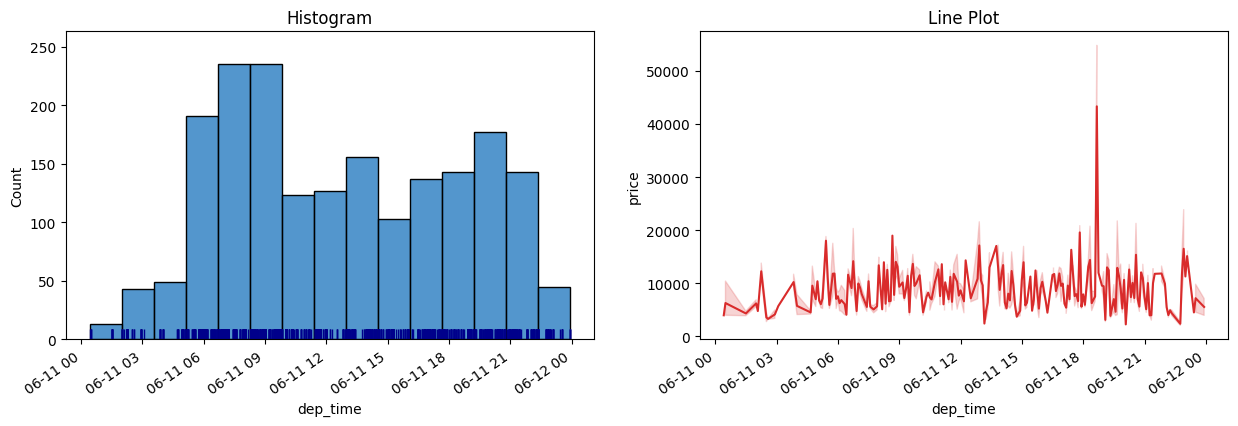

In [29]:
eda_helper.dt_univar_plots(train, 'dep_time', 'price')

In [30]:
(
    train.dep_time.dt.hour
    .pipe(lambda ser: np.select([ser.between(4,12,inclusive='left'),ser.between(12,16,inclusive='left'),
                                ser.between(16,20,inclusive='left'),ser.between(20,23,inclusive='left')],
                               ['morning','afternoon','evening','night'],
                               default='midnight'))
)

array(['night', 'afternoon', 'night', ..., 'midnight', 'afternoon',
       'morning'], dtype='<U9')

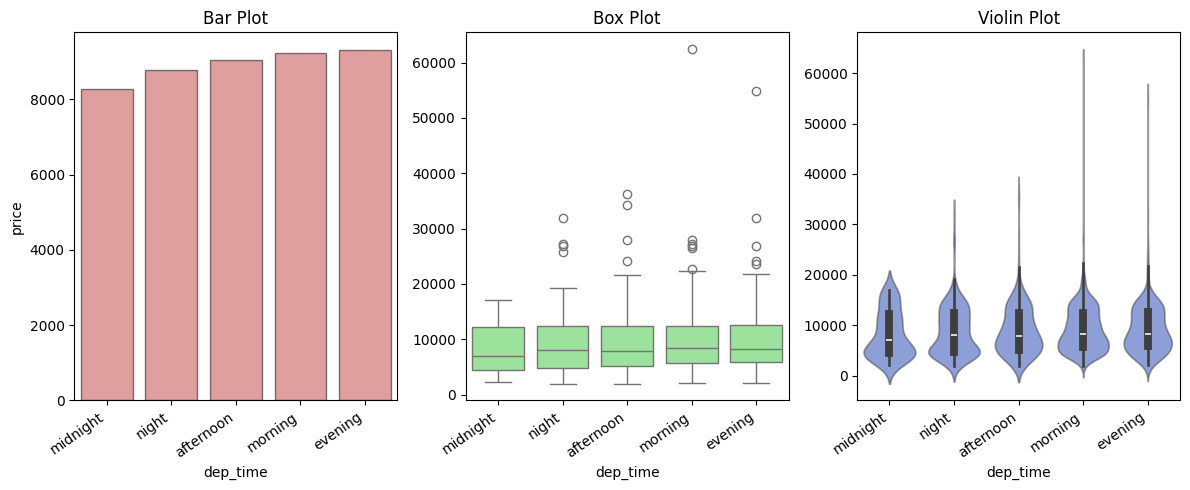

In [31]:
(
    train
    .assign(dep_time = lambda df_: (  
                        np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
                                   df_.dep_time.dt.hour.between(12,16,inclusive='left'),
                                   df_.dep_time.dt.hour.between(16,20,inclusive='left'),
                                   df_.dep_time.dt.hour.between(20,23,inclusive='left')],
                                  ['morning','afternoon','evening','night'],default='midnight') 
                                 ) )
#     .pipe(eda_helper.cat_univar_plots,'dep_time')
      .pipe(eda_helper.num_cat_bivar_plots,'price','dep_time')
)

In [32]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

- **Source & Destination**

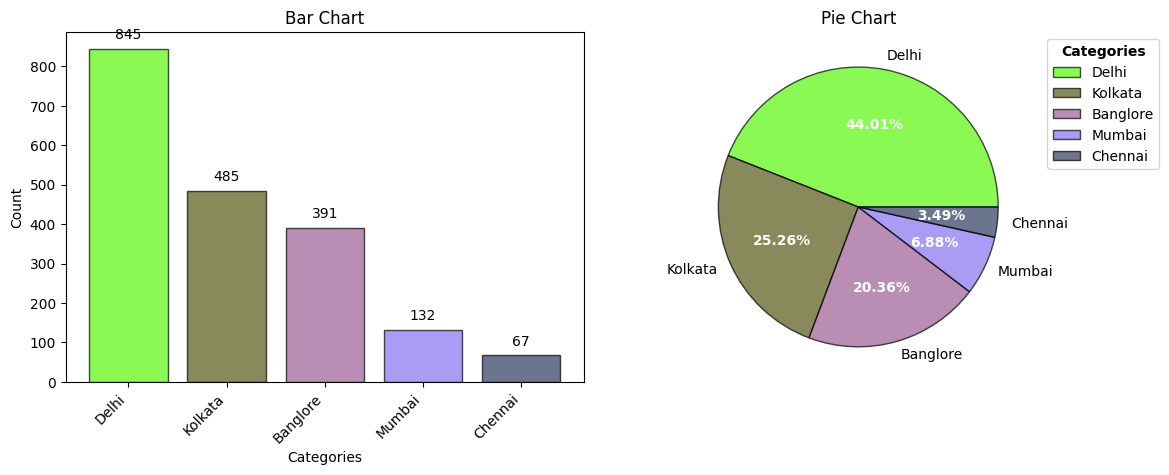

In [33]:
eda_helper.cat_univar_plots(train,'source', show_wordcloud=False)

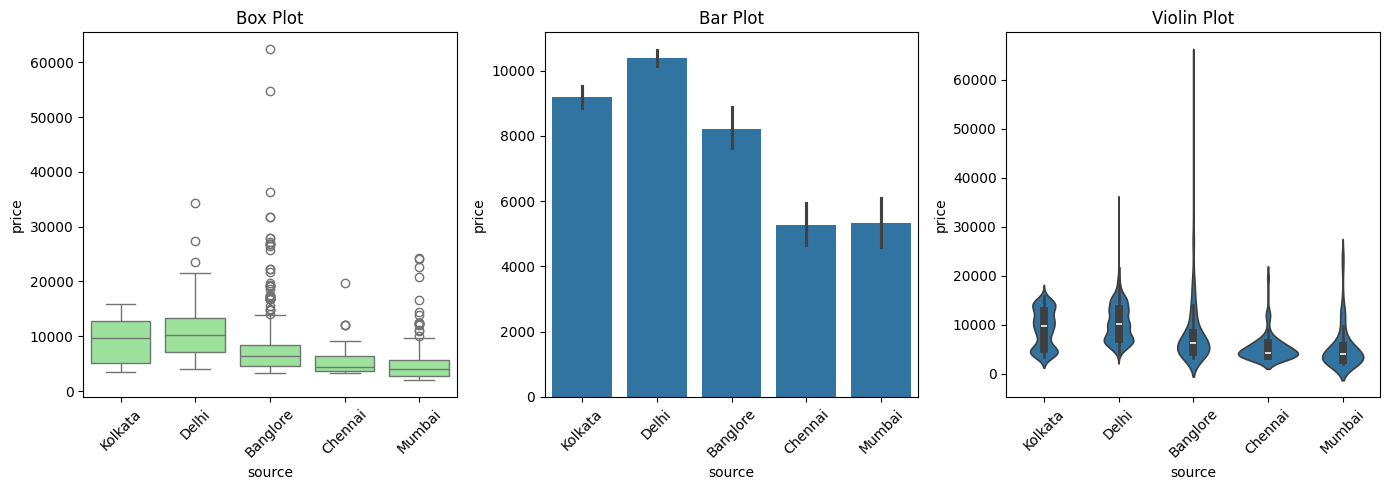

In [34]:
cr_mukltiple_plots(train, 'source','price')

In [35]:
eda_helper.num_cat_hyp_testing(train, 'price', 'source')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 57.15719432992971
- p-value              : 1.3008756722860202e-45
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 373.1213942915585
- p-value              : 1.781806454728012e-79
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


- **Duration**

In [36]:
eda_helper.num_summary(train, 'duration')

0        140
1       1180
2        775
3       1500
4       1565
        ... 
1915     155
1916     165
1917     170
1918     155
1919    1665
Name: duration, Length: 1920, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 1,920 / 1,920 rows


,value
percentile,
0%,75.0
5%,90.0
10%,145.0
25%,170.0
50%,505.0
75%,885.0
90%,1420.0
95%,1580.0
99%,1775.0


,value
mean,619.705729
trimmed mean (5%),587.424769
trimmed mean (10%),559.000651
median,505.000000


,value
var,238322.438112
std,488.182792
IQR,715.000000
mad,335.000000
coef_variance,0.787765


,value
skewness,0.903797
kurtosis,-0.026522


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value: 2.0227927868117694e-35
Test Statistic: 0.8861680190464148
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value: 0.785
Test Statistic: 70.75085361398897
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


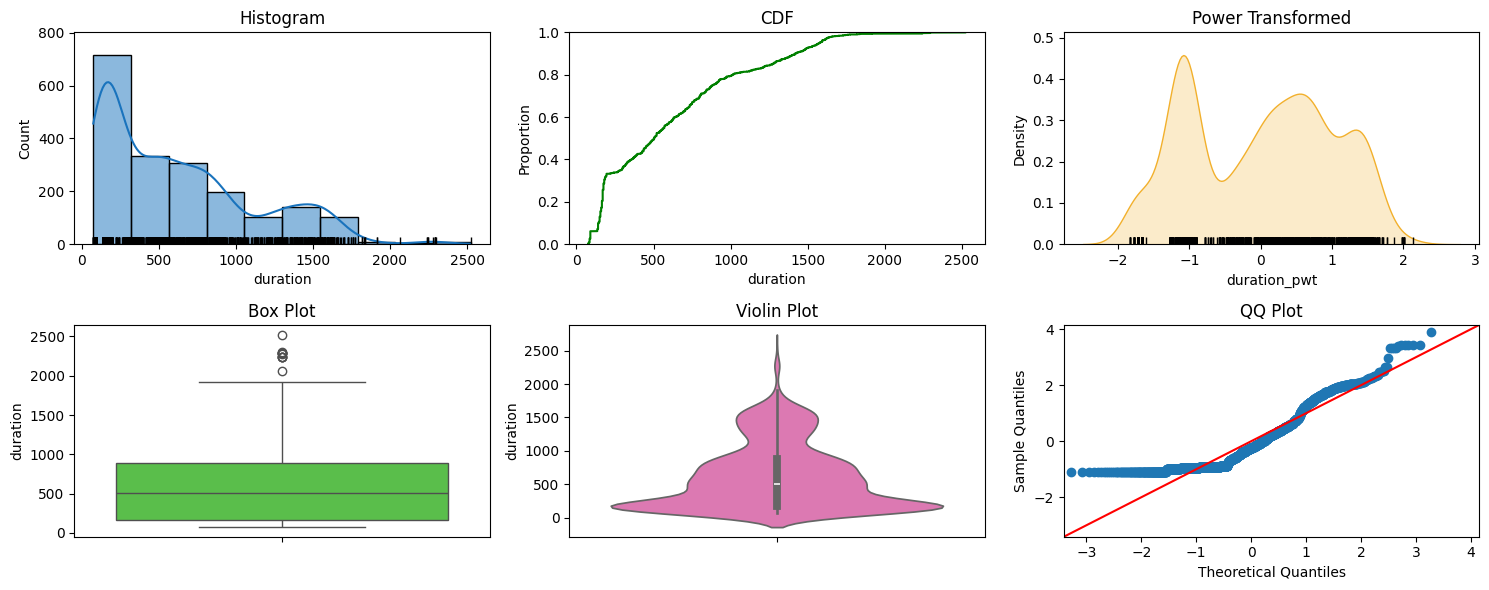

In [37]:
eda_helper.num_univar_plots(train,'duration')

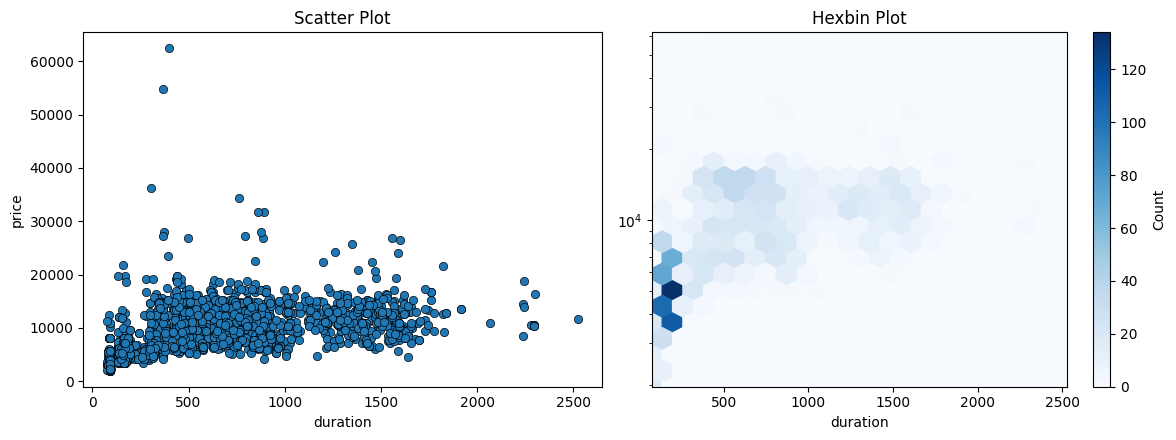

In [44]:
eda_helper.num_bivar_plots(train,'duration','price', hexbin_kwargs=dict(
    yscale='log', gridsize = 20, cmap='Blues'))

In [45]:
eda_helper.num_num_hyp_testing(train,'price', 'duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4818062058575239
- p-value              : 3.6629445324387108e-112
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6773671772007106
- p-value              : 5.003256621207644e-258
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


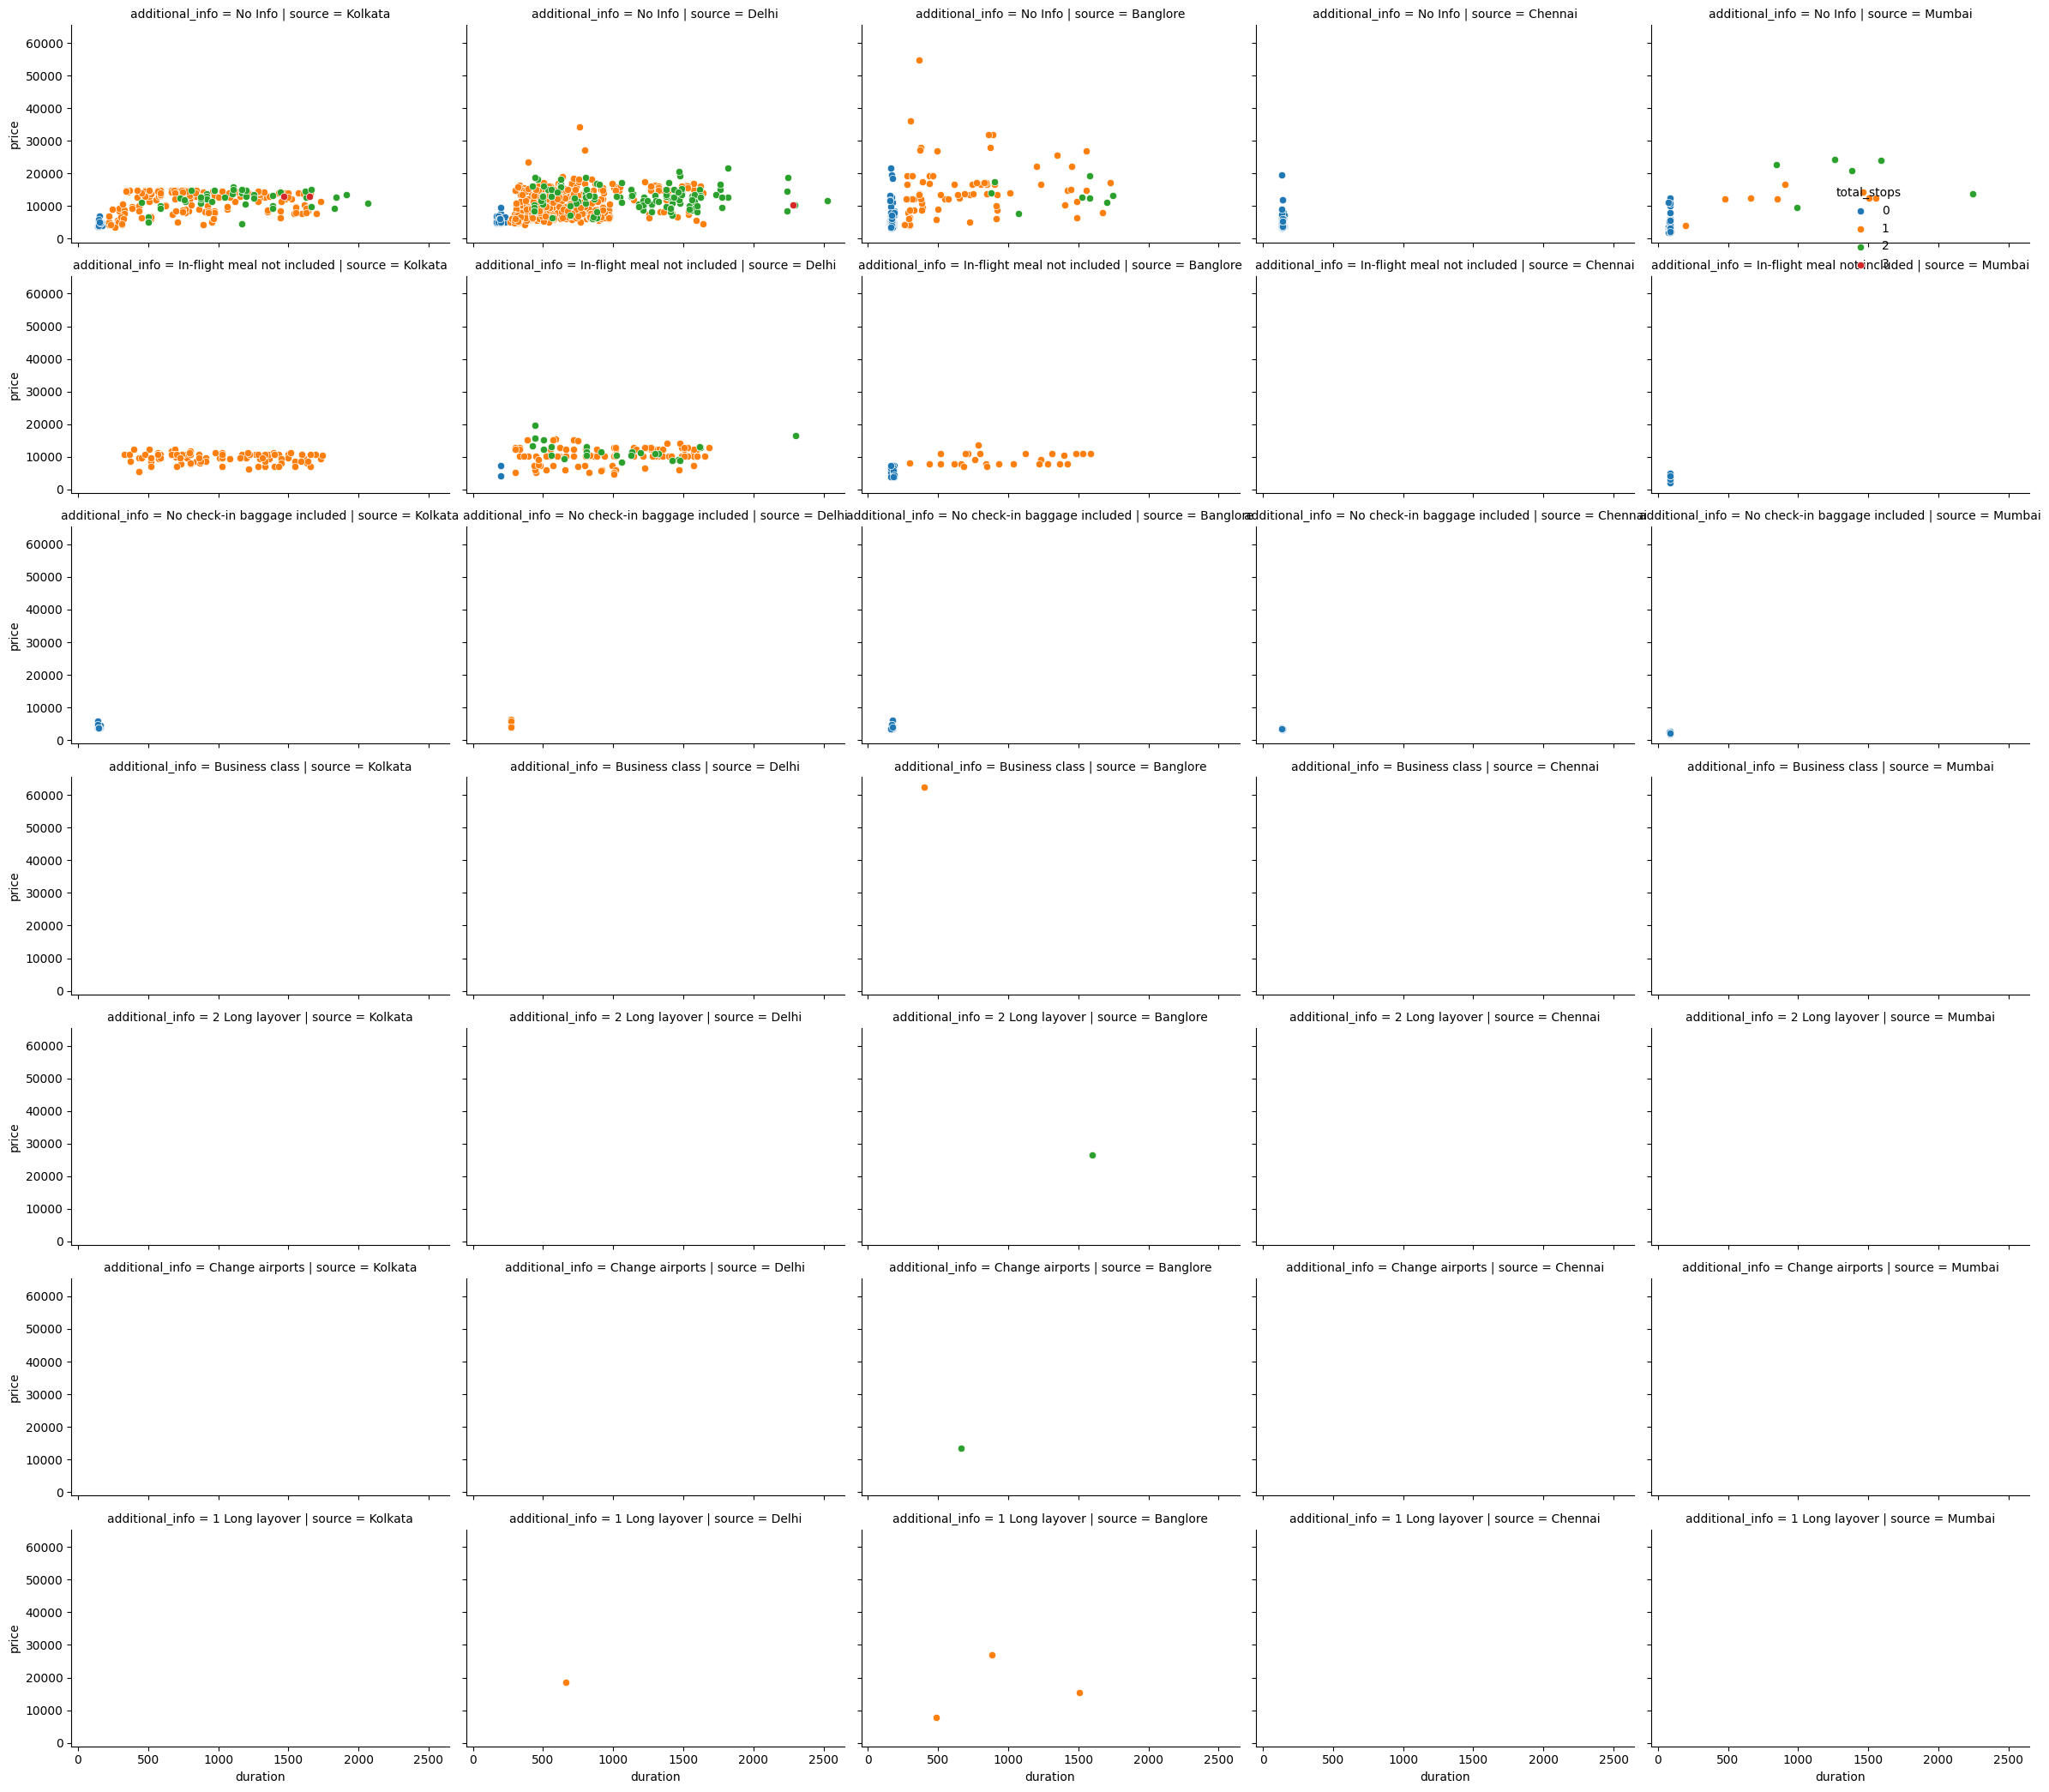

In [61]:
dur_gr = sns.FacetGrid(train,col='source',row='additional_info',hue='total_stops',aspect=1.6,sharey=True)
dur_gr.map_dataframe(sns.scatterplot, x='duration', y='price')
dur_gr.add_legend(loc='upper right', bbox_to_anchor=(0.9,0.9))

### Automated EDA

In [1]:
!pip install ydata_profiling

     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     --------------------- ----------------- 61.4/109.0 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 102.4/109.0 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 109.0/109.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   --------- ------------------------------ 81.9/359.5 kB ? eta -:--:--
   --------------- ------------------------ 143.4/359.5 kB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/359.5 kB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/359.5 kB 1.7 MB/s eta 0:00:01
   ------------------------- -------------- 225.3/359.5 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 225.3/359.5 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --

In [2]:
from ydata_profiling import ProfileReport

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
 report = ProfileReport(train, title='EDA Report')

In [8]:
report.to_file(output_file='report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 162.44it/s]
